In [1]:
library(ggplot2)
library(tidyverse)
library(viridis)
library(viridisLite)
library(readxl)
library(ggpubr)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: viridisLite



In [2]:
dir()

[1] "antibody.ipynb"                       
 [2] "antibody.svg"                         
 [3] "antibody.xlsx"                        
 [4] "CD4-8.ipynb"                          
 [5] "CD4CD8 T cells.svg"                   
 [6] "CD4CD8.xlsx"                          
 [7] "complement.ipynb"                     
 [8] "complement.svg"                       
 [9] "complement.xls"                       
[10] "complement.xlsx"                      
[11] "complement111.svg"                    
[12] "correlation_c4bp_factorH.svg"         
[13] "cytokines.ipynb"                      
[14] "cytokines.svg"                        
[15] "data.xls"                             
[16] "factor h.svg"                         
[17] "full_complement.svg"                  
[18] "gene expression_without_outliers.xlsx"
[19] "gene expression.xlsx"                 
[20] "gene expressions.ipynb"               
[21] "gene_expression.svg"                  
[22] "inflammatory cytokines.xlsx"          
[23] "MetaboAnalystR"                       
[24] "notitle.png"                          
[25] "pheatmap.svg"                         
[26] "pheatmap2.svg"                        
[27] "pheatmap3333.svg"                     
[28] "pheatmap4444.svg"                     
[29] "plot4.png"                            
[30] "R-4.1.0-1-1.x86_64.rpm"               
[31] "RcppArmadillo_0.9.900.3.0.tar.gz"     
[32] "Untitled.ipynb"                       
[33] "Untitled1.ipynb"

In [3]:
antibody <- read_excel("antibody.xlsx")
head(antibody)

animal,groups,type,treatment,replicate,items,concentrate
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
A01,A,immune_enhancing,control,0,IgA,102.71820
A02,A,immune_enhancing,control,0,IgA,116.33964
A03,A,immune_enhancing,control,0,IgA,171.40503
A03,A,immune_enhancing,control,0,IgA,167.34758
A04,A,immune_enhancing,control,0,IgA,107.93492
A05,A,immune_enhancing,control,0,IgA,92.76779


In [4]:
# Convert the variable dose from a numeric to a factor variable
antibody$replicate <- as.factor(antibody$replicate)
head(antibody)

animal,groups,type,treatment,replicate,items,concentrate
<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<dbl>
A01,A,immune_enhancing,control,0,IgA,102.71820
A02,A,immune_enhancing,control,0,IgA,116.33964
A03,A,immune_enhancing,control,0,IgA,171.40503
A03,A,immune_enhancing,control,0,IgA,167.34758
A04,A,immune_enhancing,control,0,IgA,107.93492
A05,A,immune_enhancing,control,0,IgA,92.76779


In [18]:
my_comparisons <- list(c("control", "UGAM"),c("Normal","Disease"))
antibody$treatment <- factor(antibody$treatment, levels=c("control", "UGAM", "Normal", "Disease"))

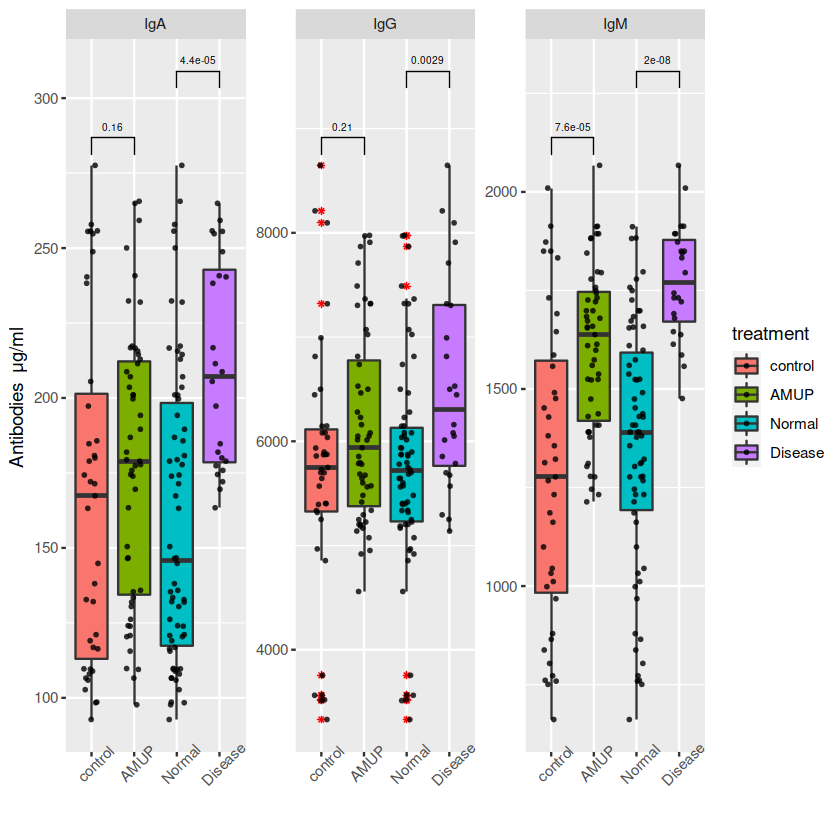

In [21]:
p_antibody <- ggplot(antibody, aes(x=treatment, y=concentrate, fill=treatment)) +
    geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size =1) +
    geom_jitter(shape=16, size=1, alpha =0.8,position = position_jitter(0.18)) +
    stat_compare_means(comparisons = my_comparisons, size=2, exact = FALSE) + # add pairwise comparison
#     stat_compare_means()  + # add global p-value +
    labs(
#         title = expression(paste("Antibodies influenced by AMUP and DSS ",italic("Astragalus membranaceus")," ultrafine particles")),
#         subtitle = "(limited to characters with more than 100 appearances)",
        y = "immunoglobulins （μg/ml）", x = "") +
    theme(axis.text.x = element_text(angle=45))+
    facet_wrap(~items, scales= "free", nrow=1)
p_antibody

In [22]:
svg("antibody.svg")
p_antibody
dev.off()

png 
  2